In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition
import pandas as pd

# Plot parameter setting 
plt.style.use('default')
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['figure.figsize'] = 8, 6
plt.rcParams['figure.dpi'] = 100

The following code is almost fully functional. There are several lines ask you to modify the code. Please take a look at the comment and follow it.

In [2]:
# Load data
training_set = pd.read_csv("./HW6_feature_training.csv", header=0, index_col=0)
testing_set = pd.read_csv("./HW6_feature_testing.csv", header=0, index_col=0)

training_set

,wear,0,1,2,3,4
0,2,0.527141,0.105478,-0.069901,0.035916,0.253410
1,0,-1.222737,-1.127575,-1.219325,-1.202351,-0.655102
2,0,-1.363232,-1.448206,-1.400232,-1.430880,-0.925576
3,0,-1.366216,-1.264779,-1.314740,-1.320908,-0.573287
4,1,0.116694,-0.376053,-0.367998,-0.332198,-0.898004
...,...,...,...,...,...,...
91,1,-0.093894,-0.431845,-0.554960,-0.472385,-0.975902
92,1,0.220699,-0.259736,-0.392296,-0.333446,-0.829488
93,1,-0.554683,-0.260343,-0.526351,-0.469507,-0.697185
94,3,2.129216,2.177049,1.496932,1.765564,-0.147299


In [3]:
Feature = pd.concat([training_set, testing_set])
Feature.loc["Fisher 1"] = ""
Feature.loc["Fisher 2"] = ""

F0 = Feature[Feature.wear == 0]
F1 = Feature[Feature.wear == 1]
F2 = Feature[Feature.wear == 2]
F3 = Feature[Feature.wear == 3]

for feature in Feature.columns[1:]:
    m0 = np.mean(F0[feature])
    m1 = np.mean(F1[feature])
    m2 = np.mean(F2[feature])
    m3 = np.mean(F3[feature])
    s0 = np.std(F0[feature])
    s1 = np.std(F1[feature])
    s2 = np.std(F2[feature])
    s3 = np.std(F3[feature])
    Feature.loc["Fisher 1", feature] = (m0 - m3)**2 / (s0**2 + s3**2)# Your code for Fisher ratio
    Feature.loc["Fisher 2", feature] = (m1 - m2)**2 / (s1**2 + s2**2)# Your code for Fisher ratio

Feature.loc["Fisher compound"] = Feature.loc["Fisher 1"] + Feature.loc["Fisher 2"] 

Feature

,wear,0,1,2,3,4
0,2,0.527141,0.105478,-0.069901,0.035916,0.25341
1,0,-1.222737,-1.127575,-1.219325,-1.202351,-0.655102
2,0,-1.363232,-1.448206,-1.400232,-1.43088,-0.925576
3,0,-1.366216,-1.264779,-1.31474,-1.320908,-0.573287
4,1,0.116694,-0.376053,-0.367998,-0.332198,-0.898004
...,...,...,...,...,...,...
22,0,-1.488835,-1.203298,-0.923722,-1.059814,-0.601119
23,2,-0.02213,-0.258944,0.094462,0.012421,-0.02689
Fisher 1,,8.421768,11.6569,11.923065,12.913996,5.674556
Fisher 2,,1.578224,2.135868,2.639434,2.532383,1.96369


0.7083333333333334
0.7916666666666666


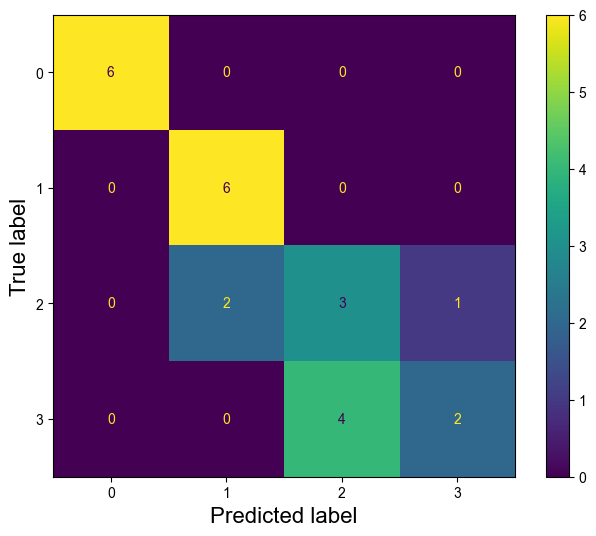

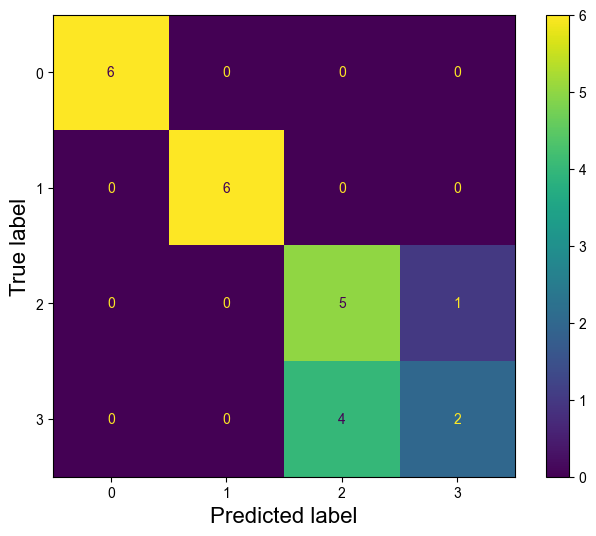

In [23]:
# Problem 1.3
# Classifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

selected = ["0", "1", "2", "3", "4"] # Modified the code to make sure it is the feature index you choose

x_train = training_set[selected]
y_train = training_set["wear"]
x_test = testing_set[selected]
y_test = testing_set["wear"]

clf_lda = LinearDiscriminantAnalysis()
clf_qda = QuadraticDiscriminantAnalysis()
# clf_svm = SVC(kernel="rbf") # Modified the kernel to see the difference
# clf_knn = KNeighborsClassifier(n_neighbors=5) # Modified the K to see the difference

clf_lda.fit(x_train, y_train)
clf_qda.fit(x_train, y_train)
# clf_svm.fit(x_train, y_train)
# clf_knn.fit(x_train, y_train)

# Change the classifier to show different result
ConfusionMatrixDisplay.from_estimator(clf_lda, x_test, y_test)
print(accuracy_score(clf_lda.predict(x_test), y_test))

ConfusionMatrixDisplay.from_estimator(clf_qda, x_test, y_test)
print(accuracy_score(clf_qda.predict(x_test), y_test))

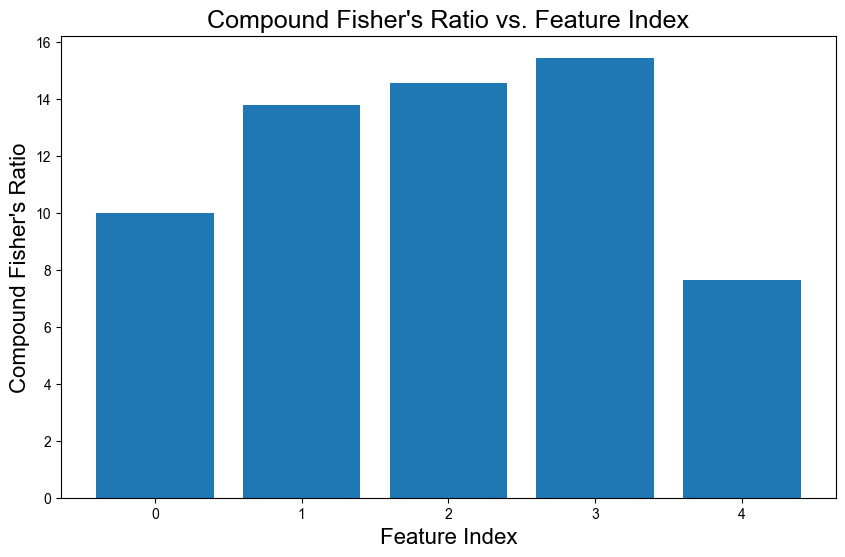

In [8]:
# problem 1.2

# Plotting the compound Fisher's ratio vs. feature index
plt.figure(figsize=(10, 6))
plt.bar(range(len(Feature.columns[1:])), Feature.loc["Fisher compound"].values[1:])
plt.xlabel('Feature Index')
plt.ylabel('Compound Fisher\'s Ratio')
plt.title('Compound Fisher\'s Ratio vs. Feature Index')
plt.show()


0.8333333333333334
0.875


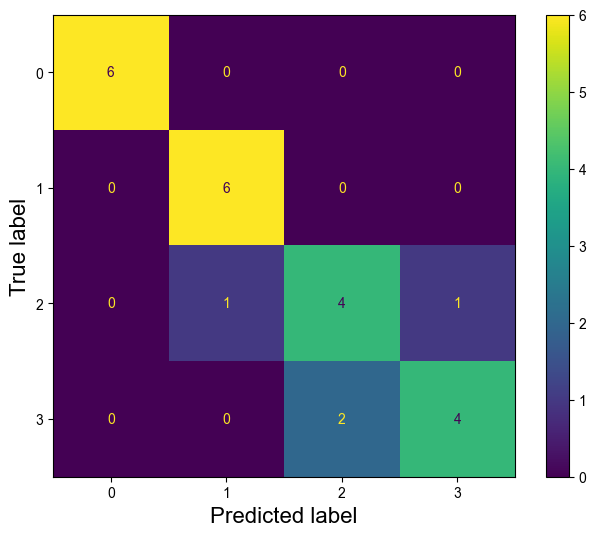

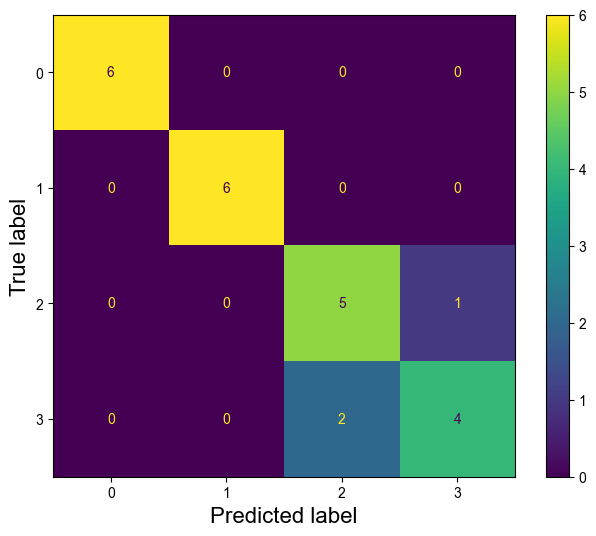

In [24]:
# Problem 1.4
# Classifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

selected = ["2", "3"] # Modified the code to make sure it is the feature index you choose

x_train = training_set[selected]
y_train = training_set["wear"]
x_test = testing_set[selected]
y_test = testing_set["wear"]

clf_lda = LinearDiscriminantAnalysis()
clf_qda = QuadraticDiscriminantAnalysis()
# clf_svm = SVC(kernel="rbf") # Modified the kernel to see the difference
# clf_knn = KNeighborsClassifier(n_neighbors=5) # Modified the K to see the difference

clf_lda.fit(x_train, y_train)
clf_qda.fit(x_train, y_train)
# clf_svm.fit(x_train, y_train)
# clf_knn.fit(x_train, y_train)

# Change the classifier to show different result
ConfusionMatrixDisplay.from_estimator(clf_lda, x_test, y_test)
print(accuracy_score(clf_lda.predict(x_test), y_test))

ConfusionMatrixDisplay.from_estimator(clf_qda, x_test, y_test)
print(accuracy_score(clf_qda.predict(x_test), y_test))

In [ ]:
# problem 1.5
# based on result above, we could find that if we adding more features, the accuracy will decrease
# 2 features have higher performance than 5 features

0.8333333333333334


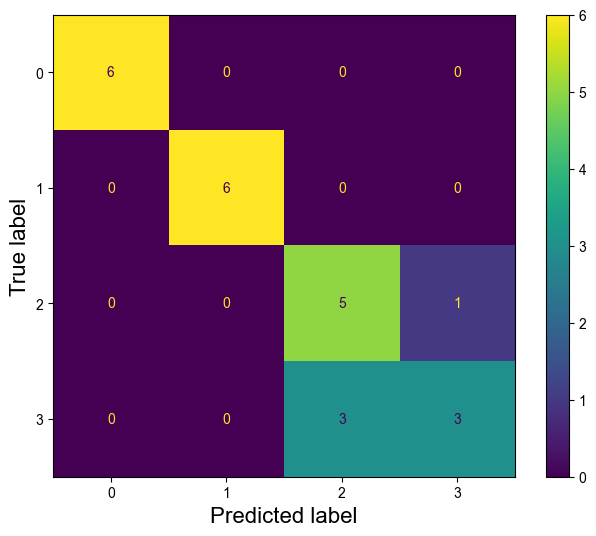

In [29]:
# Problem 1.6
# Classifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

selected = ["2", "3"] # Modified the code to make sure it is the feature index you choose

x_train = training_set[selected]
y_train = training_set["wear"]
x_test = testing_set[selected]
y_test = testing_set["wear"]

clf_svm = SVC(kernel="linear") # Modified the kernel to see the difference

clf_svm.fit(x_train, y_train)
ConfusionMatrixDisplay.from_estimator(clf_svm, x_test, y_test)
print(accuracy_score(clf_svm.predict(x_test), y_test))

0.5416666666666666


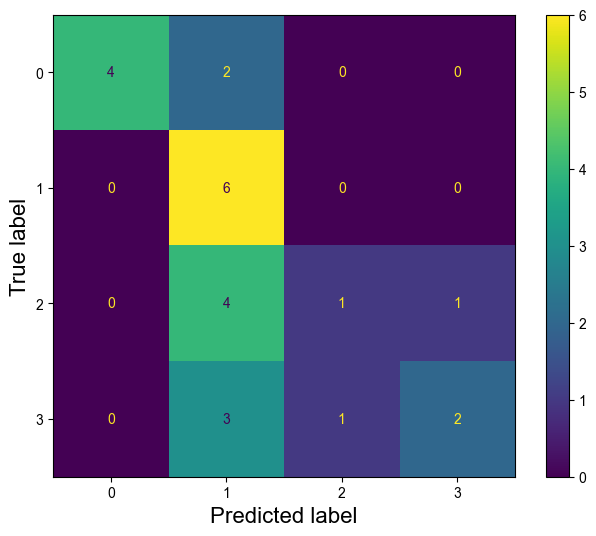

In [30]:
# Problem 1.6
# Classifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

selected = ["2", "3"] # Modified the code to make sure it is the feature index you choose

x_train = training_set[selected]
y_train = training_set["wear"]
x_test = testing_set[selected]
y_test = testing_set["wear"]

clf_svm = SVC(kernel="poly") # Modified the kernel to see the difference

clf_svm.fit(x_train, y_train)
ConfusionMatrixDisplay.from_estimator(clf_svm, x_test, y_test)
print(accuracy_score(clf_svm.predict(x_test), y_test))

0.8333333333333334


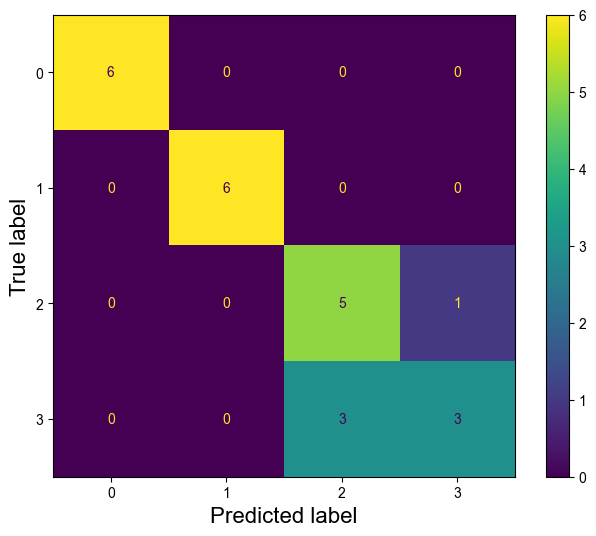

In [31]:
# Problem 1.6
# Classifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

selected = ["2", "3"] # Modified the code to make sure it is the feature index you choose

x_train = training_set[selected]
y_train = training_set["wear"]
x_test = testing_set[selected]
y_test = testing_set["wear"]

clf_svm = SVC(kernel="rbf") # Modified the kernel to see the difference

clf_svm.fit(x_train, y_train)
ConfusionMatrixDisplay.from_estimator(clf_svm, x_test, y_test)
print(accuracy_score(clf_svm.predict(x_test), y_test))

0.7916666666666666


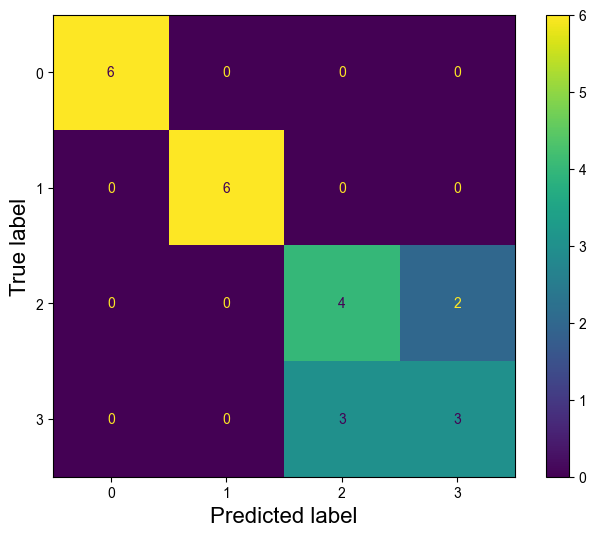

In [38]:
# Problem 1.7
# Classifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

# selected = ["0", "1", "2", "3", "4"] # Modified the code to make sure it is the feature index you choose

x_train = training_set[selected]
y_train = training_set["wear"]
x_test = testing_set[selected]
y_test = testing_set["wear"]

clf_knn = KNeighborsClassifier(n_neighbors=1) # Modified the K to see the difference


clf_knn.fit(x_train, y_train)

# Change the classifier to show different result
ConfusionMatrixDisplay.from_estimator(clf_knn, x_test, y_test)
print(accuracy_score(clf_knn.predict(x_test), y_test))

0.8333333333333334


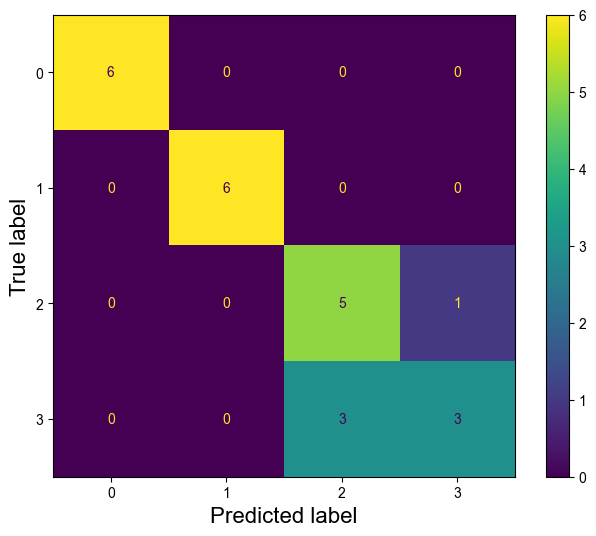

In [36]:
# Problem 1.7
# Classifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

# selected = ["0", "1", "2", "3", "4"] # Modified the code to make sure it is the feature index you choose

x_train = training_set[selected]
y_train = training_set["wear"]
x_test = testing_set[selected]
y_test = testing_set["wear"]

clf_knn = KNeighborsClassifier(n_neighbors=5) # Modified the K to see the difference


clf_knn.fit(x_train, y_train)

# Change the classifier to show different result
ConfusionMatrixDisplay.from_estimator(clf_knn, x_test, y_test)
print(accuracy_score(clf_knn.predict(x_test), y_test))

In [ ]:
# problem 1.8
# For 2 features, we can find QDA get best accuracy which is 0.875
# Besides, knn k=5, svc rbf, svc linear, LDA have same accuracy 0.83
# In that case, the QDA is the best way when #feature is 2